# Quick Start

[`qc-grid`](https://grid.qcdevs.org/index.html) is suitable for numerical integration, interpolation and differentiation of interest for the quantum chemistry community. While it remains versatile as a general-purpose tool for numerical integration, the primary focus of `qc-grid` is to fulfill requirements of computational and conceptual density functional theory problems, so it is centered around constructing atom-centered (Becke-Lebedev-type) molecular grids. This notebook provides a quick overview of the main features of `qc-grid`.

## One-Dimensional Grids

[OneDGrid](https://grid.qcdevs.org/pyapi/grid.onedgrid.html) constructs a one-dimensional (1D) grid for integrating along a line. The `qc-grid` package offers many different quadratures for 1D integration, some in interval $[-1, 1]$ and others on the positive-infinite strip $[0, \infty)$. These are generally employed with a transformation to the $[0, \infty)$ interval and latter used as radial grids for constructing atomic grids.


In [1]:
import numpy as np
from grid.onedgrid import GaussChebyshev
from grid.rtransform import BeckeRTransform

# Construct 1D grid on [-1,1] domain using Gauss-Chebyshev quadrature rule
oned = GaussChebyshev(npoints=31)

print(f"1D grid size     : {oned.size}")
print(f"1D grid domain   : {oned.domain}")
print(f"Radial grid r_min: {np.min(oned.points):.3f}")
print(f"Radial grid r_max: {np.max(oned.points):.3f}\n")
# print(f"1D grid points   : {oned.points}\n")

# Transform grid to interval [0, infinity) domain using Becke's radial transform
rgrid = BeckeRTransform(0.0, R=1.5).transform_1d_grid(oned)

print(f"Radial grid size : {rgrid.size}")
print(f"Rgrid domain     : {rgrid.domain}")
print(f"Radial grid r_min: {np.min(rgrid.points):.3f}")
print(f"Radial grid r_max: {np.max(rgrid.points):.3f}\n")
# print(f"Radial grid points: {rgrid.points}")

1D grid size     : 31
1D grid domain   : (-1, 1)
Radial grid r_min: -0.999
Radial grid r_max: 0.999

Radial grid size : 31
Rgrid domain     : (0.0, 1e+16)
Radial grid r_min: 0.001
Radial grid r_max: 2335.872


## Angular Grids

[AngularGrid](https://grid.qcdevs.org/pyapi/grid.angular.html#grid.angular.AngularGrid) constructs an angular grid to span the surface of a sphere (with unit radius). Currently two types of angular grids are provided: Lebedev-Laikov and symmetric spherical t-design.

The simplest way to construct an `AngularGrid` is to specify the `degree` which represents the maximum degree of spherical harmonics that the angular grid can integrate accurately on a unit sphere. If the provided `degree` is not available, the closest available `degree` is used.


In [2]:
from grid.angular import AngularGrid

# user-define parameter
degree = 6

# Construct a Lebedev-Laikov grid
ang_grid = AngularGrid(degree=degree)

print(f"Lebedev-Laikov angular grid degree: {ang_grid.degree}")
print(f"Lebedev-Laikov angular grid size  : {ang_grid.size}")
print(f"Lebedev-Laikov angular grid points shape : {ang_grid.points.shape}")
print(f"Lebedev-Laikov angular grid weights shape: {ang_grid.weights.shape}\n")

# Construct a symmetric spherical t-design grid
ang_grid = AngularGrid(degree=degree, use_spherical=True)

print(f"t-design angular grid degree: {ang_grid.degree}")
print(f"t-design angular grid size  : {ang_grid.size}")
print(f"t-design angular grid points shape : {ang_grid.points.shape}")
print(f"t-design angular grid weights shape: {ang_grid.weights.shape}")

Lebedev-Laikov angular grid degree: 7
Lebedev-Laikov angular grid size  : 26
Lebedev-Laikov angular grid points shape : (26, 3)
Lebedev-Laikov angular grid weights shape: (26,)

t-design angular grid degree: 7
t-design angular grid size  : 32
t-design angular grid points shape : (32, 3)
t-design angular grid weights shape: (32,)


## Atomic Grid

[`AtomGrid`](https://grid.qcdevs.org/pyapi/grid.atomgrid.html#grid.atomgrid.AtomGrid) constructs an atomic grid by combining a radial and angular grid to span the entire 3D space. This gris is typically used for evaluating and integrating functions centered on an atom.

The simplest way to construct an `AtomGrid` is by providing an instance of radial grid and degree of the (Lebedev-Likov) angular grid. The grid is centered at origin by default, unless `center` argument is specified.


In [3]:
from grid.atomgrid import AtomGrid

# Construct atom-centered grid using radial grid and degree of angular grid
atomgrid = AtomGrid(rgrid, degrees=[11])

print(f"AtomGrid size: {atomgrid.size}")
print(f"AtomGrid radial size : {atomgrid.rgrid.size}")
print(f"AtomGrid angular degrees: {atomgrid.degrees}")

AtomGrid size: 1550
AtomGrid radial size : 31
AtomGrid angular degrees: [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]


## Molecular Grid

[MolGrid](https://grid.qcdevs.org/pyapi/grid.molgrid.html#grid.molgrid.MolGrid) constructs a grid by combining a set of atomic grids and atoms-in-molecules weight function. These weight functions are typically [BeckeWeights](https://grid.qcdevs.org/pyapi/grid.becke.html#grid.becke.BeckeWeights) resulting in Becke-Lebedev molecular grid which are the most commonly used grids in quantum chemistry.

The simplest way to set up a molecular grid is by using the [MolGrid.from_preset](https://grid.qcdevs.org/pyapi/grid.molgrid.html#grid.molgrid.MolGrid.from_preset) method with an appropriate radial grid (a 1D grid spanning the $[0, \infty)$ domain). Here, we build a grid for $\mathrm{H}_{2}$ molecule.


In [4]:
import numpy as np
from grid import GaussLegendre, BeckeRTransform, BeckeWeights, MolGrid

# define atomic coordinates (in bohr) and atomic numbers for H2
atcoords = np.array([[0.0, -1.0, 0.0], [0.0, 1.0, 0.0]])
atnums = np.array([1, 1])

# construct a radial grid from a 1D grid on [-1, 1] and then transforming it to [0, infinity)
oned_grid = GaussLegendre(npoints=50)
rgrid = BeckeRTransform(0.0, R=1.5).transform_1d_grid(oned_grid)

# construct a molecular grid using the Becke partitioning scheme
mgrid = MolGrid.from_preset(
    atnums=atnums,
    atcoords=atcoords,
    # the same radial grid is used for all atoms
    rgrid=rgrid,
    # different angular degrees for each atom
    preset="fine",
    aim_weights=BeckeWeights(),
    # store the individual atomic grids (used for interpolation)
    store=True,
)

print(f"Molecular grid size             : {mgrid.size}")
print(f"Molecular grid atomic grid sizes  : {[atgrid.size for atgrid in mgrid.atgrids]}")
print(f"Molecular grid points shape     : {mgrid.points.shape}")
print(f"Molecular grid weights shape    : {mgrid.weights.shape}")
print(f"Molecular grid centers: \n{mgrid.atcoords}")

Molecular grid size             : 6320
Molecular grid atomic grid sizes  : [3160, 3160]
Molecular grid points shape     : (6320, 3)
Molecular grid weights shape    : (6320,)
Molecular grid centers: 
[[ 0. -1.  0.]
 [ 0.  1.  0.]]


### Visualize 3D Grid Points

The figure shows that transformation applied the Gauss-Legendre 1D grid to obtain the radial grid, makes the grid more dense near the nuclei, where the integrand more likely to have higher values. The angular grid is composed of Lebedev-Laikov points, which are distributed uniformly over the sphere. The combination of the two grids results in a grid that is more dense near the nuclei and less dense away from the nuclei.


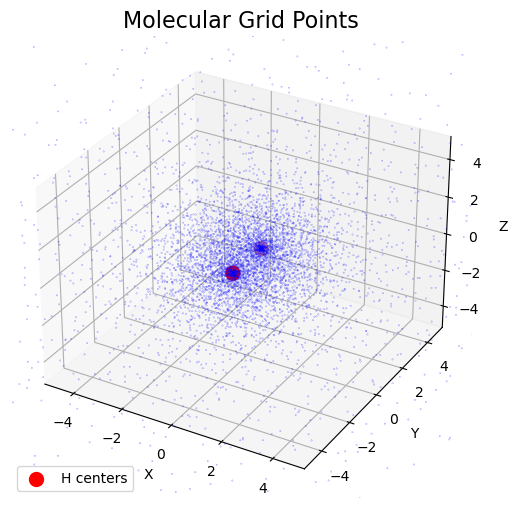

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot grid points
ax.scatter(mgrid.points[:, 0], mgrid.points[:, 1], mgrid.points[:, 2], s=0.1, c="b", marker=".")

# Plot atomic centers with label
ax.scatter(
    atcoords[:, 0], atcoords[:, 1], atcoords[:, 2], s=100, c="r", marker="o", label="H centers"
)

# Set axis limits (to fit our data), labels, and legend
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.set_zlim((-5, 5))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.title("Molecular Grid Points", fontsize=16)
plt.show()

### Integrate Electron Density on the Grid

To integrate the electron density on the grid, we need to first evaluate it on the grid points. Here, we will evaluate and integrate the electron density of the $\mathrm{H}_{2}^{+}$ system. The wavefunction of the $\mathrm{H}_{2}^{+}$ can be approximated as a linear combination of two hydrogen-like 1s atomic orbitals:

$$\psi_{\mathrm{H}_{2}^{+}}(\mathbf{r}) = c_A\phi_{1s}(||\mathbf{r} - \mathbf{R}_A||) + c_B\phi_{1s}(||\mathbf{r} - \mathbf{R}_B||)$$

where $c_A$ and $c_B$ are the coefficients of the 1s orbitals centered at $R_A$ and $R_B$ denoting the position of the nucleus $\mathbf{R}_A$ and $\mathbf{R}_B$, and $\phi_{1s}(r)$ is the hydrogen-like (1s) atomic orbital:

$$\phi_{1s}(r) = \frac{1}{\sqrt{\pi}}e^{-r}$$

For the bonding solution, the coefficients correspond to a normalization constant and are given by:

$$c_A = c_B = \left(\int |\psi_{\mathrm{H}_{2}^{+}}(\mathbf{r})|^2 d\mathbf{r}\right)^{-1/2}= \frac{1}{\sqrt{2 + 2 S_{AB}}}$$

where $S_{AB}$ is the overlap integral between the two atomic orbitals computed analytically by:

$$S_{AB} = \int \phi^{*}_{1s}(||\mathbf{r} - \mathbf{R}_A||)\times\phi_{1s}(||\mathbf{r} - \mathbf{R}_B||) d\mathbf{r} =  \left(1 + R + \frac{R^2}{3}\right)e^{-R} $$

where $R$ is the internuclear distance in atomic units.

Here we use [`grid.integrate`](https://grid.qcdevs.org/pyapi/grid.basegrid.html#grid.basegrid.Grid.integrate) function compare the numerical integration of $S_{ab}$, normalization constant, and electron density with their analytical counterparts.


In [6]:
# compute the distance between the two atoms
R = np.linalg.norm(atcoords[0] - atcoords[1])

# Evaluate 1s orbitals (centered on each atom) on the entire grid points
s1_a_vals = np.sqrt(1 / np.pi) * np.exp(-np.linalg.norm(mgrid.points - atcoords[0], axis=1))
s1_b_vals = np.sqrt(1 / np.pi) * np.exp(-np.linalg.norm(mgrid.points - atcoords[1], axis=1))

# Calculate overlap integral analytically and numerically
S_ab = (1 + R + R**2 / 3) * np.exp(-R)
S_ab_num = mgrid.integrate(s1_a_vals * s1_b_vals)

print(f"Overlap integral (analytical): {S_ab}")
print(f"Overlap integral (numerical) : {S_ab_num}\n")

# Calculate normalization constant analytically and numerically
N = 1.0 / np.sqrt(2 + 2 * S_ab)
N_num = 1.0 / np.sqrt(mgrid.integrate((s1_a_vals + s1_b_vals) ** 2))

print(f"Normalization constant (analytical): {N}")
print(f"Normalization constant (numerical) : {N_num}\n")

# Build the wavefunction values on the grid points as a sum of 1s orbitals (centered on each atom)
psi_vals = N_num * (s1_a_vals + s1_b_vals)

# Compute the electron density and integrate it across all space
dens_vals = psi_vals**2
n_electrons = mgrid.integrate(dens_vals)
print(f"Integral of the electron density: {n_electrons} (expected to be 1)")

Overlap integral (analytical): 0.5864528940253216
Overlap integral (numerical) : 0.5864528869452882

Normalization constant (analytical): 0.5613987115061903
Normalization constant (numerical) : 0.5613987044473437

Integral of the electron density: 1.000000000000001 (expected to be 1)


### Interpolate Electron Density on the Grid

The [`grid.interpolate`](https://grid.qcdevs.org/pyapi/grid.molgrid.html#grid.molgrid.MolGrid.interpolate) functionality can be used to interpolate any scalar function at any point in space from evaluating the function on the grid points. Here, we use the electron density of $\mathrm{H}_{2}^{+}$ evaluated on the molecular grid to interpolate the electron density on a set of uniformly distributed points in the xy-plane (stored in `points` variable).


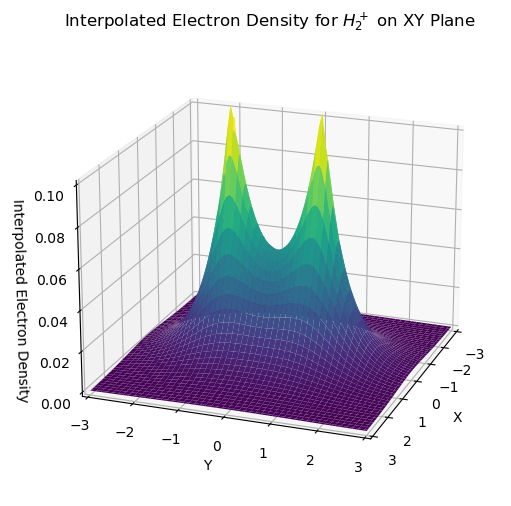

In [7]:
# Sample points uniformly in the xy-plane (z=0)
x_grid = np.linspace(-3, 3, 100)
y_grid = np.linspace(-3, 3, 100)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
x_grid = x_grid.flatten()
y_grid = y_grid.flatten()
z_grid = np.zeros_like(x_grid)
points = np.array([x_grid, y_grid, z_grid]).T

# Interpolated electron density one the xy-plane
func_interpolation = mgrid.interpolate(dens_vals)
rho_iner = func_interpolation(points=points).reshape(100, 100)

# Create 3D Counterplot of the interpolated electron density
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Adjust the limits to fit your data
ax.set_xlim((-3, 3))
ax.set_ylim((-3, 3))
ax.set_zlim((0, 0.1))

# Plot the interpolated electron density
ax.plot_surface(x_grid.reshape(100, 100), y_grid.reshape(100, 100), rho_iner, cmap="viridis")

# Change the view angle, set labels and title
ax.view_init(elev=20, azim=20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Interpolated Electron Density")
ax.set_title("Interpolated Electron Density for $H_2^+$ on XY Plane")
plt.show()

#### Check Interpolation Accuracy

Here we compare the interpolated density values in the xy-planes to the actual values computed by the analytical expression.


In [8]:
# Compute electron density on the xy-plane points analytically
s1_a_vals = np.sqrt(1 / np.pi) * np.exp(-np.linalg.norm(points - atcoords[0], axis=1))
s1_b_vals = np.sqrt(1 / np.pi) * np.exp(-np.linalg.norm(points - atcoords[1], axis=1))
psi_vals = N_num * (s1_a_vals + s1_b_vals)
rho = psi_vals**2

# Compute the electron density and integrate it across all space
rho_iner = func_interpolation(points=points)

print("Compare interpolated and analytical electron density")
print(f"Maximum Absolute Different: {np.max(np.abs(rho_iner - rho))}")

Compare interpolated and analytical electron density
Maximum Absolute Different: 0.0002467277364103964


### Differentiate Electron Density on the Grid

Given the value of a scalar function on the grid points, the [`grid.interpolate`](https://grid.qcdevs.org/pyapi/grid.molgrid.html#grid.molgrid.MolGrid.interpolate) can also be used to find the function derivative at any point in space. Here, we find the gradient of the electron density of $\mathrm{H}_{2}^{+}$ evaluated on a set of uniformly distributed points in a xy-plane (stored in `points` variable).


In [9]:
# Sample points uniformly in the xy-plane (z=0)
x_grid = np.linspace(-3, 3, 50)
y_grid = np.linspace(-3, 3, 50)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
x_grid = x_grid.flatten()
y_grid = y_grid.flatten()
z_grid = np.zeros_like(x_grid)
points = np.array([x_grid, y_grid, z_grid]).T

# Interpolated gradient of electron density one the xy-plane
grad_rho_iner = func_interpolation(points=points, deriv=1)

print("For each point, the gradient is a vector with 3 components")
print(f"Shape of the gradient array for {len(points)} points: {grad_rho_iner.shape}\n")
print(f"In a planar molecule, the gradient in the molecular plane should not have a z-component")
print(f"Maximum z-component of the interpolated gradient: {np.max(np.abs(grad_rho_iner[:, 2]))}")

For each point, the gradient is a vector with 3 components
Shape of the gradient array for 2500 points: (2500, 3)

In a planar molecule, the gradient in the molecular plane should not have a z-component
Maximum z-component of the interpolated gradient: 0.00016216121124713824


#### Check interpolated derivative accuracy
Check the accuracy of the gradient by comparing it to the analytical gradient computed by the analytical expression.

In [10]:
# Compute psi values analytically
s1_a_vals = np.sqrt(1 / np.pi) * np.exp(-np.linalg.norm(points - atcoords[0], axis=1))
s1_b_vals = np.sqrt(1 / np.pi) * np.exp(-np.linalg.norm(points - atcoords[1], axis=1))
psi_vals = N_num * (s1_a_vals + s1_b_vals)

# Compute the gradient of psi analytically
s1_a_grad = s1_a_vals[:, np.newaxis] * (points - atcoords[0])
s1_b_grad = s1_b_vals[:, np.newaxis] * (points - atcoords[1])
psi_grad = N_num * (s1_a_grad + s1_b_grad)

# Compute gradient of electron rho analytically
rho_grad = -2 * psi_vals[:, np.newaxis] * psi_grad

print("Compare interpolated and analytical electron density gradient")
print(f"Maximum Absolute Difference in any component: {np.max(np.abs(grad_rho_iner - rho_grad))}")
print(f"Mean Absolute Difference in any component: {np.mean(np.abs(grad_rho_iner - rho_grad))}")

Compare interpolated and analytical electron density gradient
Maximum Absolute Difference in any component: 0.1649554955098528
Mean Absolute Difference in any component: 0.005061691165558479


#### Graphical comparisons of the accuracy

Here, a graphical illustration is done to compare the accuracy of the interpolation of the derivative.  It will be shown that the areas close to teh nuclei have the largest errors.

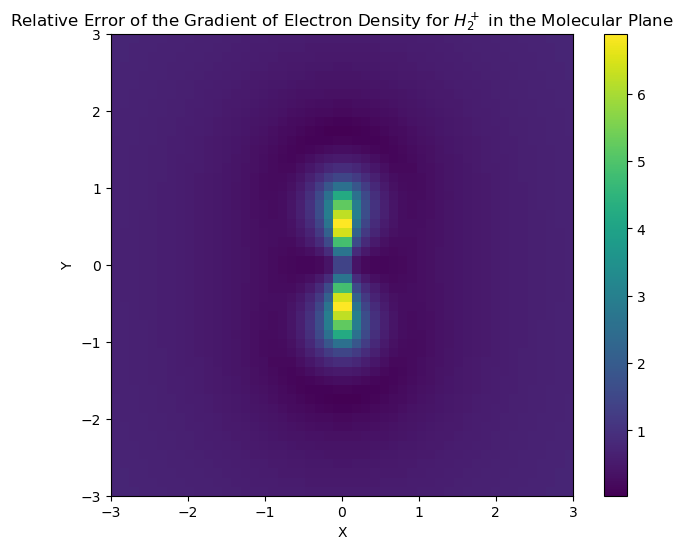

In [11]:
# compute the norm of the difference between the interpolated and analytical gradient
rho_error_norm = np.linalg.norm(grad_rho_iner - rho_grad, axis=1)
# divide by the norm of the analytical gradient
rho_error_norm /= np.linalg.norm(rho_grad, axis=1)

# create heatmap of the relative error
rho_error_norm = rho_error_norm.reshape(50, 50)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Adjust the limits to fit your data
ax.set_xlim((-3, 3))
ax.set_ylim((-3, 3))

# Plot the error heatmap
im = ax.imshow(rho_error_norm, cmap="viridis", interpolation="none", extent=[-3, 3, -3, 3])
fig.colorbar(im)

# Set labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Relative Error of the Gradient of Electron Density for $H_2^+$ in the Molecular Plane")
plt.show()

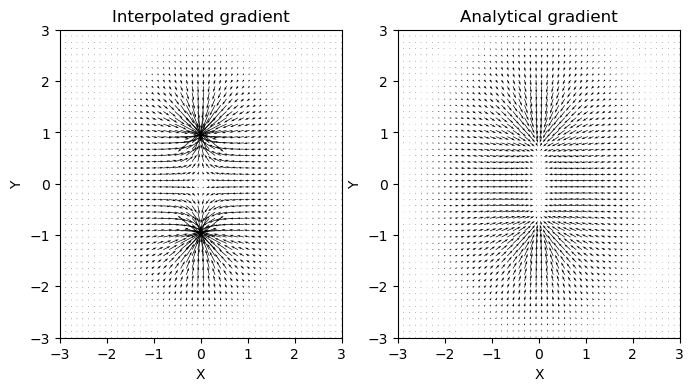

In [12]:
# Create vectorial map of the interpolated and the analytical gradient
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)

# Adjust the limits to fit your data
ax.set_xlim((-3, 3))
ax.set_ylim((-3, 3))

# Plot the vectorial map (omit the z-component) of the interpolated gradient
ax.quiver(points[:, 0], points[:, 1], grad_rho_iner[:, 0], grad_rho_iner[:, 1])

# Set labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Interpolated gradient")

ax2 = fig.add_subplot(122)

# Adjust the limits to fit your data
ax2.set_xlim((-3, 3))
ax2.set_ylim((-3, 3))

# Plot the vectorial map (omit the z-component) of the analytical gradient
ax2.quiver(points[:, 0], points[:, 1], rho_grad[:, 0], rho_grad[:, 1])

# Set labels and title
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("Analytical gradient")

plt.show()
